In [288]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler

In [289]:
credible_authors = pd.read_csv('derived-data/authors-scientific-extended.csv')

In [290]:
cohort_1990 = credible_authors[credible_authors.start_year == 1991]
#cohort_1990 = cohort_1990.set_index("author")
#cohort_1990.head()

In [291]:
cols_std = ['early_career_qual_3',
       'early_career_recognition_EC3_RC5', 'succ_after_15y',
       'early_career_prod_3', 'early_career_degree_3',
       'early_career_coauthor_max_cit_3']

### Prune Dataset
We focus on people that published between 0 to 6 papers in their first 3 career years.
Publishing more than 2 papers per year seems to be almost undoable.
Maybe this approach helps to remove people that are also outlier on other variables.

In [292]:
max_prod = cohort_1990['early_career_prod_3'].max()
cohort_1990[cohort_1990['early_career_prod_3'] == max_prod]
print("max_prod in full dataset: ",max_prod)
# this person has only 9 publications here
# https://dblp.uni-trier.de/pers/hd/p/Pomeranz:Irith

max_degree = cohort_1990['early_career_degree_3'].max()
print("max_degree in full dataset: ",max_degree)
max_early_career_coauthor_max_cit_3 = cohort_1990['early_career_coauthor_max_cit_3'].max()
print("early_career_coauthor_max_cit_3 in full dataset: ",max_early_career_coauthor_max_cit_3)

print(cohort_1990.shape)
cohort_1990_red = cohort_1990[cohort_1990["early_career_prod_3"]<=6]
print(cohort_1990_red.shape)
print(cohort_1990_red.shape[0]/cohort_1990.shape[0])

cohort_1990 = cohort_1990_red



max_degree = cohort_1990['early_career_degree_3'].max()
print("max_degree in pruned dataset (only authors with <= 6 papers in first 3 years):  ",max_degree)


max_coauthor_max_cit_3 = cohort_1990['early_career_coauthor_max_cit_3'].max()
print("max_coauthor_max_cit_3 in pruned dataset (only authors with <= 6 papers in first 3 years):  ",max_coauthor_max_cit_3)



max_prod in full dataset:  40
max_degree in full dataset:  35.0
early_career_coauthor_max_cit_3 in full dataset:  4732.0
(12430, 13)
(12262, 13)
0.986484312148029
max_degree in pruned dataset (only authors with <= 6 papers in first 3 years):   35.0
max_coauthor_max_cit_3 in pruned dataset (only authors with <= 6 papers in first 3 years):   4732.0


In [293]:



cohort_1990_copy = cohort_1990.copy()

# Here we should also try a robust scaler since our data is pretty skewed
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

#standardized_cols = StandardScaler().fit_transform(cohort_1990_copy[cols_std])
standardized_cols = RobustScaler().fit_transform(cohort_1990_copy[cols_std])


standardized_cols = pd.DataFrame(standardized_cols, index=cohort_1990.index, columns=cols_std)

# we need that to merge
standardized_cols['ind'] = standardized_cols.index
cohort_1990['ind'] = cohort_1990.index

standardized_cols = standardized_cols.rename(index=str, columns={"early_career_qual_3": "early_career_qual_3_std", 
                                             "early_career_recognition_EC3_RC5": "early_career_recognition_EC3_RC5_std",
                                             "succ_after_15y": "succ_after_15y_std",
                                              "early_career_prod_3": "early_career_prod_3_std",
                                             "early_career_degree_3": "early_career_degree_3_std",
                                             "early_career_coauthor_max_cit_3": "early_career_coauthor_max_cit_3_std"
                                            })


cohort_1990 = pd.merge(cohort_1990, standardized_cols, on="ind")
print(cohort_1990.head())



              author  start_year  end_year  total_num_pub  career_length  \
0       a. a. m. tax        1991      1991              1              1   
1       a. a. shahid        1991      1991              1              1   
2           a. alves        1991      1991              1              1   
3       a. annweiler        1991      1991              1              1   
4  a. antonio arroyo        1991      2012              2             22   

  gender  early_career_degree_3  early_career_qual_3  \
0      m                    1.0                  6.0   
1      m                    0.0                  0.0   
2      m                    2.0                  2.0   
3      m                    0.0                  0.0   
4      m                    0.0                  0.0   

   early_career_recognition_EC3_RC3  early_career_recognition_EC3_RC5  \
0                               2.0                               3.0   
1                               0.0                         

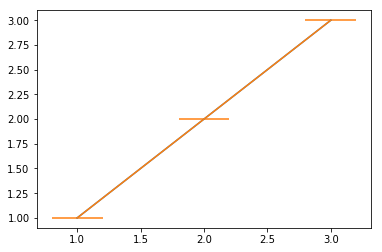

In [294]:
plt.plot([1,2,3], [1,2,3])
plt.errorbar([1,2,3], [1,2,3], xerr=0.2)
plt.show()

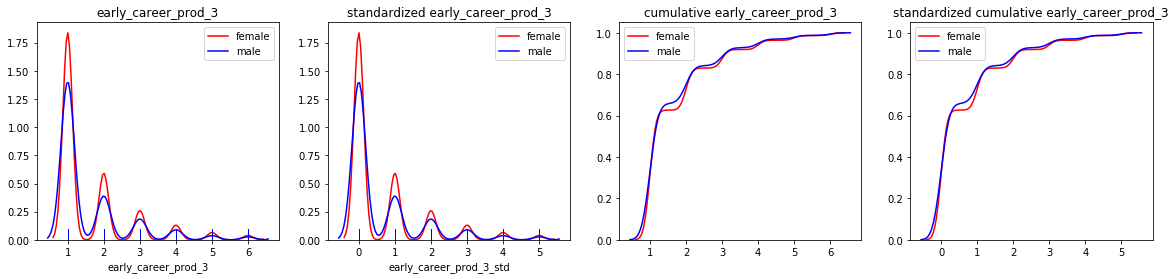

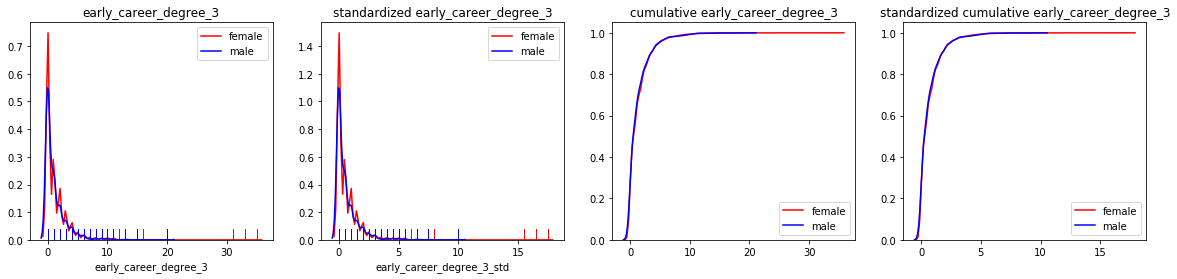

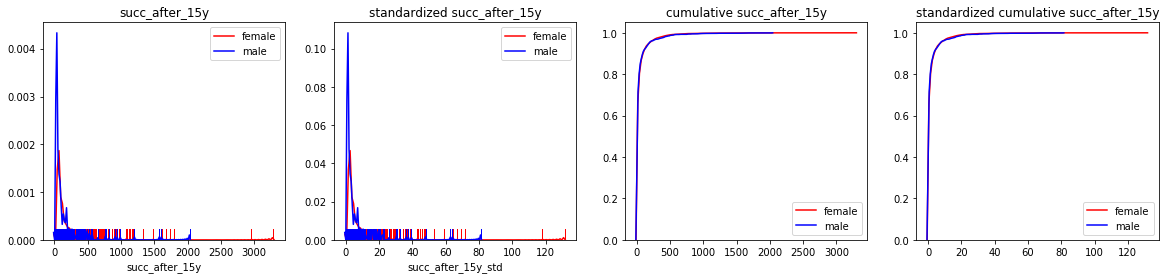

In [298]:
fig1, (ax11, ax12, ax13, ax14) = plt.subplots(figsize=(20, 4), nrows=1, ncols=4)
#ax = sns.lineplot(x="timepoint", y="signal", hue="gender",data=fmri)
sns.distplot(cohort_1990[cohort_1990["gender"]=="m"].early_career_prod_3, label="female", color="red", ax=ax11, hist=False, rug=True)
sns.distplot(cohort_1990[cohort_1990["gender"]=="f"].early_career_prod_3, label="male", color="blue", ax=ax11, hist=False, rug=True)
ax11.set_title("early_career_prod_3")
sns.distplot(cohort_1990[cohort_1990["gender"]=="m"].early_career_prod_3_std, label="female", color="red", ax=ax12,  hist=False, rug=True)
sns.distplot(cohort_1990[cohort_1990["gender"]=="f"].early_career_prod_3_std, label="male", color="blue", ax=ax12,  hist=False, rug=True)
ax12.set_title("standardized early_career_prod_3")
sns.kdeplot(cohort_1990[cohort_1990["gender"]=="m"].early_career_prod_3, label="female", color="red", cumulative=1, ax=ax13)
sns.kdeplot(cohort_1990[cohort_1990["gender"]=="f"].early_career_prod_3, label="male", color="blue", cumulative=1, ax=ax13)
ax=ax13.set_title("cumulative early_career_prod_3")
sns.kdeplot(cohort_1990[cohort_1990["gender"]=="m"].early_career_prod_3_std, label="female", color="red", cumulative=1, ax=ax14)
sns.kdeplot(cohort_1990[cohort_1990["gender"]=="f"].early_career_prod_3_std, label="male", color="blue", cumulative=1, ax=ax14)
ax=ax14.set_title("standardized cumulative early_career_prod_3")

fig1, (ax11, ax12, ax13, ax14) = plt.subplots(figsize=(20, 4), nrows=1, ncols=4)
sns.distplot(cohort_1990[cohort_1990["gender"]=="m"].early_career_degree_3, label="female", color="red", ax=ax11,  hist=False, rug=True)
sns.distplot(cohort_1990[cohort_1990["gender"]=="f"].early_career_degree_3, label="male", color="blue", ax=ax11,  hist=False, rug=True)
ax11.set_title("early_career_degree_3")
sns.distplot(cohort_1990[cohort_1990["gender"]=="m"].early_career_degree_3_std, label="female", color="red", ax=ax12,  hist=False, rug=True)
sns.distplot(cohort_1990[cohort_1990["gender"]=="f"].early_career_degree_3_std, label="male", color="blue", ax=ax12,  hist=False, rug=True)
ax12.set_title("standardized early_career_degree_3")
sns.kdeplot(cohort_1990[cohort_1990["gender"]=="m"].early_career_degree_3, label="female", color="red", cumulative=1, ax=ax13)
sns.kdeplot(cohort_1990[cohort_1990["gender"]=="f"].early_career_degree_3, label="male", color="blue", cumulative=1, ax=ax13)
ax=ax13.set_title("cumulative early_career_degree_3")
sns.kdeplot(cohort_1990[cohort_1990["gender"]=="m"].early_career_degree_3_std, label="female", color="red", cumulative=1, ax=ax14)
sns.kdeplot(cohort_1990[cohort_1990["gender"]=="f"].early_career_degree_3_std, label="male", color="blue", cumulative=1, ax=ax14)
ax=ax14.set_title("standardized cumulative early_career_degree_3")


fig1, (ax11, ax12, ax13, ax14) = plt.subplots(figsize=(20, 4), nrows=1, ncols=4)
sns.distplot(cohort_1990[cohort_1990["gender"]=="m"].succ_after_15y, label="female", color="red", ax=ax11,  hist=False, rug=True)
sns.distplot(cohort_1990[cohort_1990["gender"]=="f"].succ_after_15y, label="male", color="blue", ax=ax11,  hist=False, rug=True)
ax11.set_title("succ_after_15y")
sns.distplot(cohort_1990[cohort_1990["gender"]=="m"].succ_after_15y_std, label="female", color="red", ax=ax12,  hist=False, rug=True)
sns.distplot(cohort_1990[cohort_1990["gender"]=="f"].succ_after_15y_std, label="male", color="blue", ax=ax12, hist=False, rug=True)
ax12.set_title("standardized succ_after_15y")
sns.kdeplot(cohort_1990[cohort_1990["gender"]=="m"].succ_after_15y, label="female", color="red", cumulative=1, ax=ax13)
sns.kdeplot(cohort_1990[cohort_1990["gender"]=="f"].succ_after_15y, label="male", color="blue", cumulative=1, ax=ax13)
ax=ax13.set_title("cumulative succ_after_15y")
sns.kdeplot(cohort_1990[cohort_1990["gender"]=="m"].succ_after_15y_std, label="female", color="red", cumulative=1, ax=ax14)
sns.kdeplot(cohort_1990[cohort_1990["gender"]=="f"].succ_after_15y_std, label="male", color="blue", cumulative=1, ax=ax14)
ax=ax14.set_title("standardized cumulative succ_after_15y")


#CCDF Plot
#n_bins = 100
#fig, ax = plt.subplots(figsize=(8, 4))
# Overlay a reversed cumulative histogram.
#ax.hist(cohort_1990[cohort_1990["gender"]=="f"].early_career_prod_3, bins=n_bins, normed=1, histtype='step', cumulative=-1,
#        label='female')
#ax.hist(cohort_1990[cohort_1990["gender"]=="m"].early_career_prod_3, bins=n_bins, normed=1, histtype='step', cumulative=-1,
#        label='male')


KeyError: 'early_career_coauthor_max_cit_3'

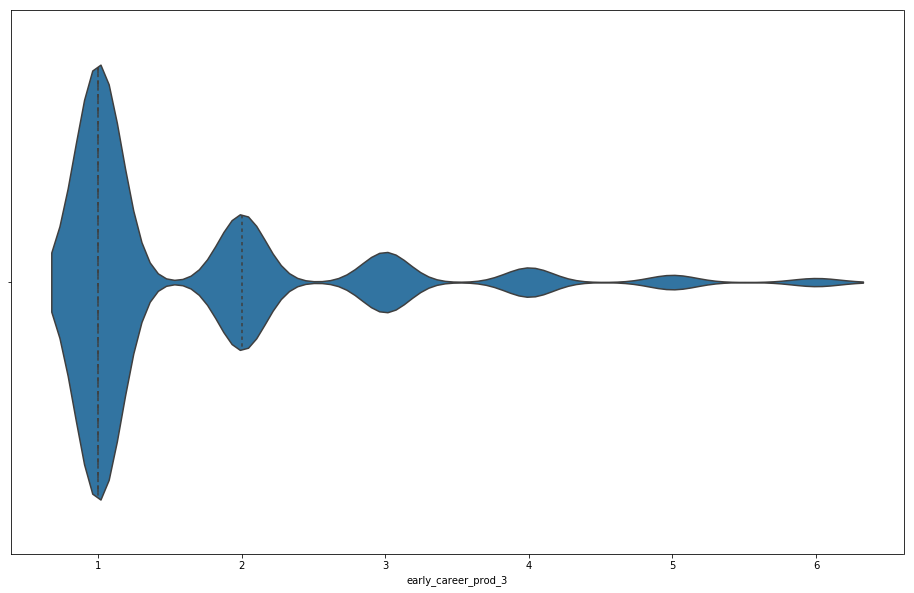

In [296]:

plt.figure(figsize=(16,10))
ax = sns.violinplot(cohort_1990['early_career_prod_3'], kde=True, rug=False, inner="quartile")
ax.errorbar(percents_dict[col][1], 0, yerr=0.3)
plt.show()

In [ ]:
[percents_dict['early_career_prod_3'][3]]*10

In [ ]:
np.linspace(0,1,11)

In [299]:
for col in cols_std:
    plt.figure(figsize=(16,10))
    sns.distplot(standardized_cols[col], kde=True, rug=False)
    plt.plot([percents_dict[col][1]]*10, np.linspace(0,1,10), label="90 percent")
    plt.plot([percents_dict[col][2]]*10, np.linspace(0,1,10), label="95 percent")
    plt.plot([percents_dict[col][3]]*10, np.linspace(0,1,10), label="99 percent")
    plt.title(col)
    print("90, ", percents_dict[col][1])
    print("95, ", percents_dict[col][2])
    print("99, ", percents_dict[col][3])
    print("max, ", cohort_1990[col].max())
    plt.legend()
    plt.show()

KeyError: 'early_career_qual_3'

In [ ]:
percents = [80, 90, 95, 99, 99.5, 99.9]
percents_dict = {}
for col in cols_std:
    vals = np.percentile(cohort_1990[col], percents)
    percents_dict[col] = vals

In [ ]:
percents_dict